In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime as dt
from datetime import datetime, timedelta 


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64 and df[column].dtype != '<M8[ns]':
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

def amtzero(x,y,z):
    if (y<=0):
        salesamt = 0
    else:
        salesamt=y        
    return(salesamt)

def qtyzero(x,y,z):
    if (z<=0):
        salesqty = 0
    else:
        salesqty=z
    return(salesqty)

def amtmean(x,y,z):
    startdate = pd.to_datetime("03/16/2020").date()
    enddate = pd.to_datetime("05/18/2020").date()
    if (y<=0):
        start_date = x + timedelta(days=-372)
        end_date = x + timedelta(days=-365)
        salesamt_mean = df.loc[((df['date']>= start_date) & (df['date'] <= end_date)), 'salesamt'].mean()
    else:
        salesamt_mean = y
    return(salesamt_mean)

def qtymean(x,y,z):
    startdate = pd.to_datetime("03/16/2020").date()
    enddate = pd.to_datetime("05/18/2020").date()
    if (z<=0):
        start_date = x + timedelta(days=-372)
        end_date = x + timedelta(days=-365)
        salesqty_mean = df.loc[((df['date']>= start_date) & (df['date'] <= end_date)), 'salesqty'].mean()
    else:
        salesqty_mean = z
    return(salesqty_mean)

In [2]:
#df = pd.read_csv('./data/banded_sales_18_19_20.csv', parse_dates=['date'])
df = pd.read_csv('./data/roller_sales_booking.csv', parse_dates=['date'])
df = df[df['date']>='10/31/2017']
df = df.fillna(0)

df_weeklysales = df.groupby(pd.Grouper(key='date', freq='W')).sum().reset_index()
df_weeklysales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      163 non-null    datetime64[ns]
 1   salesamt  163 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.7 KB


In [3]:
m,n = df_weeklysales.shape
#calculate number of bins
bins = int(np.round(np.sqrt(m))) + 2
fig,a =  plt.subplots(1,2,figsize=(10,5))

sns.histplot(df_weeklysales['salesamt'], bins=bins+2, ax=a[0])
a[0].set_title('Histogram for weekly sales')
a[0].set_xticks([])
a[0].set_yticks([])

#sns.kdeplot(df['amygdala'], ax=a[1],shade=True, bw= 0.25)
sns.kdeplot(df_weeklysales['salesamt'], bw_method= 0.2,ax =a[1])
a[1].set_title('KDE for datapoint weekly sales')
a[1].set_xticks([])
a[1].set_yticks([])

NameError: name 'plt' is not defined

Text(0.5, 0, 'Week')

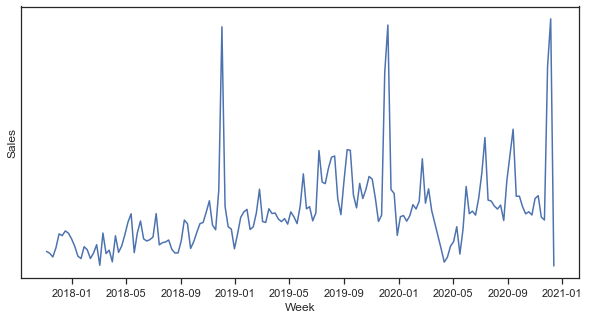

In [4]:
plt.figure(figsize=(10,5))
plt.plot(df_weeklysales['date'],df_weeklysales['salesamt'])
plt.yticks([])
plt.ylabel('Sales')
plt.xlabel('Week')

In [5]:
print(df_weeklysales.loc[df_weeklysales['salesamt']<=0]['date'])

Series([], Name: date, dtype: datetime64[ns])


In [10]:
df = pd.read_csv('./data/roller_sales_booking.csv', parse_dates=['date'])
#df = df[(df['date']>='01/01/2018') & (df['date'] <'01/01/2020')]
df = df[df['date']>'10/31/2017']
df = df.fillna(0)

#replace negative sales amounts with 0
#df['salesamt'] = df.apply(lambda row :  amtzero(row['date'],row['salesamt'], row['salesqty']), axis = 1)
#df['salesqty'] = df.apply(lambda row :  qtyzero(row['date'],row['salesamt'], row['salesqty']), axis = 1)

#replace the data for april, may and june 2020 with the mean from 2019
#df['adjusted_salesamt'] = df.apply(lambda row :  amtmean(row['date'],row['salesamt'], row['salesqty']), axis = 1)
#df['adjusted_salesqty'] = df.apply(lambda row :  qtymean(row['date'],row['salesamt'], row['salesqty']), axis = 1)
df_training = df.copy()



Text(0.5, 0, 'Date')

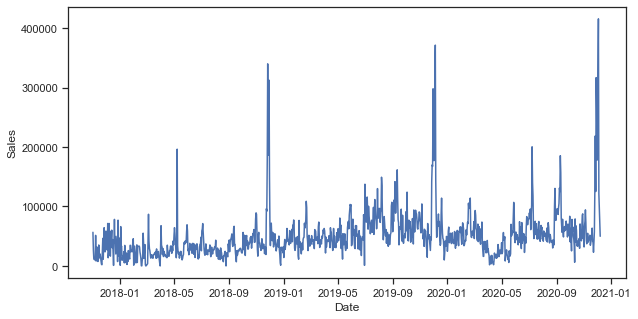

In [11]:
df_dailysales = df_training.groupby('date', as_index=False)['salesamt'].sum()

plt.figure(figsize=(10,5))
plt.plot(df_dailysales['date'],df_dailysales['salesamt'])
plt.ylabel('Sales')
plt.xlabel('Date')


In [12]:
df_weeklysales = df_training.groupby(pd.Grouper(key='date', freq='W')).sum().reset_index()
df_monthlysales = df_training.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()


In [13]:
df_weeklysales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      163 non-null    datetime64[ns]
 1   salesamt  163 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.7 KB


([], <a list of 0 Text major ticklabel objects>)

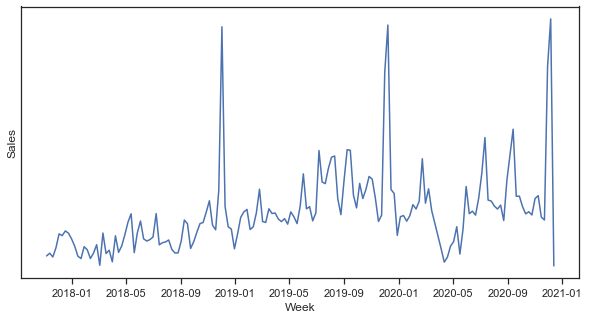

In [14]:
plt.figure(figsize=(10,5))
plt.plot(df_weeklysales['date'],df_weeklysales['salesamt'])
plt.ylabel('Sales')
plt.xlabel('Week')
plt.yticks([])



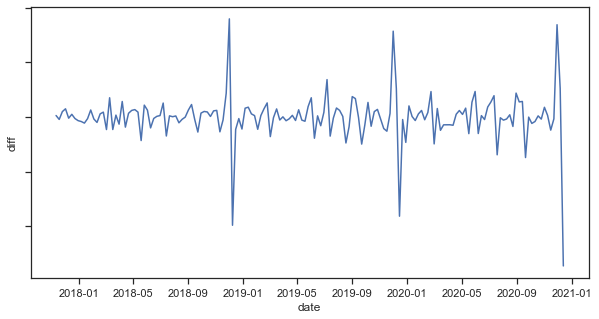

In [15]:
#create a new dataframe to model the difference
df_diff_weekly = df_weeklysales.copy()

#add previous sales to the next row
df_diff_weekly['prev_sales'] = df_diff_weekly['salesamt'].shift(1)    
#drop the null values and calculate the difference
df_diff_weekly = df_diff_weekly.dropna()
df_diff_weekly['diff'] = (df_diff_weekly['salesamt'] - df_diff_weekly['prev_sales'])

#plot sales diff
fig,a =  plt.subplots(1,1,figsize=(10, 5))

sns.lineplot(data=df_diff_weekly, x="date", y="diff")
a.set(yticklabels=[])
plt.show()


In [20]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf

#create dataframe for transformation from time series to supervised
df_supervised = df_diff_weekly.drop(['prev_sales'],axis=1)
#adding lagsmax_rsq
    
field_names = 'diff ~ '
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    field_names += field_name + ' + '
    df_supervised[field_name] = df_supervised['diff'].shift(inc)
#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)

field_names = field_names[:-2]

# Define the regression formula
model = smf.ols(formula=field_names, data=df_supervised)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj

print(regression_adj_rsq)


0.29855752397762225


In [22]:
# Define the regression formula
model = smf.ols(formula=field_names, data=df_supervised)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print (field_names)
print(regression_adj_rsq)
print(df_supervised.info())

diff ~ lag_1 + lag_2 + lag_3 + lag_4 + lag_5 + lag_6 + lag_7 + lag_8 + lag_9 + lag_10 + lag_11 + lag_12 
0.29855752397762225
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      150 non-null    datetime64[ns]
 1   salesamt  150 non-null    int64         
 2   diff      150 non-null    float64       
 3   lag_1     150 non-null    float64       
 4   lag_2     150 non-null    float64       
 5   lag_3     150 non-null    float64       
 6   lag_4     150 non-null    float64       
 7   lag_5     150 non-null    float64       
 8   lag_6     150 non-null    float64       
 9   lag_7     150 non-null    float64       
 10  lag_8     150 non-null    float64       
 11  lag_9     150 non-null    float64       
 12  lag_10    150 non-null    float64       
 13  lag_11    150 non-null    float64       
 14  lag_12    150 non-null    flo

In [23]:
#import MinMaxScaler and create a new dataframe for LSTM model
from sklearn.preprocessing import MinMaxScaler
df_model = df_supervised.drop(['salesamt','date'],axis=1)
#split train and test set
train_set, test_set = df_model[0:-6].values, df_model[-6:].values

#apply Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)
# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [27]:
print(df_model.shape)
print(train_set.shape)
print(test_set.shape)
print(test_set)

(150, 13)
(144, 13)
(6, 13)
[[ 1.618300e+04  9.031500e+04 -1.785200e+04  1.161600e+04 -3.990600e+04
  -5.731100e+04  3.530000e+02 -3.693640e+05  1.435520e+05  1.395870e+05
   2.199770e+05 -8.495300e+04  2.165300e+04]
 [-1.185250e+05  1.618300e+04  9.031500e+04 -1.785200e+04  1.161600e+04
  -3.990600e+04 -5.731100e+04  3.530000e+02 -3.693640e+05  1.435520e+05
   1.395870e+05  2.199770e+05 -8.495300e+04]
 [-1.559800e+04 -1.185250e+05  1.618300e+04  9.031500e+04 -1.785200e+04
   1.161600e+04 -3.990600e+04 -5.731100e+04  3.530000e+02 -3.693640e+05
   1.435520e+05  1.395870e+05  2.199770e+05]
 [ 8.455980e+05 -1.559800e+04 -1.185250e+05  1.618300e+04  9.031500e+04
  -1.785200e+04  1.161600e+04 -3.990600e+04 -5.731100e+04  3.530000e+02
  -3.693640e+05  1.435520e+05  1.395870e+05]
 [ 2.622370e+05  8.455980e+05 -1.559800e+04 -1.185250e+05  1.618300e+04
   9.031500e+04 -1.785200e+04  1.161600e+04 -3.990600e+04 -5.731100e+04
   3.530000e+02 -3.693640e+05  1.435520e+05]
 [-1.361005e+06  2.622370e+

In [52]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False)
y_pred = model.predict(X_test,batch_size=1)

model.score(X_test, y_test)

Epoch 1/100
144/144 [==============================] - 0s 1ms/step - loss: 0.0380
Epoch 2/100
144/144 [==============================] - 0s 1ms/step - loss: 0.0371
Epoch 3/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0364
Epoch 4/100
144/144 [==============================] - 0s 1ms/step - loss: 0.0358
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 6/100
144/144 [==============================] - 0s 1ms/step - loss: 0.0345
Epoch 7/100
144/144 [==============================] - 0s 1ms/step - loss: 0.0338
Epoch 8/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0331
Epoch 9/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0324
Epoch 10/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0317
Epoch 11/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0310
Epoch 12/100
144/144 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 13/100


AttributeError: 'Sequential' object has no attribute 'score'

In [53]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 1000us/step - loss: 0.7576


0.7576349377632141

In [46]:
np.concatenate([y_pred, y_test], axis=1)

array([[-3.19413841e-04,  6.46066330e-02],
       [-2.97548622e-03, -7.80928975e-02],
       [ 2.31674686e-02,  3.09402302e-02],
       [ 3.05092692e-01,  9.43226545e-01],
       [-9.63839963e-02,  3.25257747e-01],
       [-8.29572499e-01, -1.39428282e+00]])

In [47]:
y_test

array([[ 0.06460663],
       [-0.0780929 ],
       [ 0.03094023],
       [ 0.94322654],
       [ 0.32525775],
       [-1.39428282]])

In [48]:
#reshape y_pred
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])
#rebuild test set for inverse transform
pred_test_set = []
for index in range(0,len(y_pred)):
    #print (np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))
    
#reshape pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)
pred_test_set_inverted

array([[-4.51070259e+04,  9.03150000e+04, -1.78520000e+04,
         1.16160000e+04, -3.99060000e+04, -5.73110000e+04,
         3.53000000e+02, -3.69364000e+05,  1.43552000e+05,
         1.39587000e+05,  2.19977000e+05, -8.49530000e+04,
         2.16530000e+04],
       [-4.76143516e+04,  1.61830000e+04,  9.03150000e+04,
        -1.78520000e+04,  1.16160000e+04, -3.99060000e+04,
        -5.73110000e+04,  3.53000000e+02, -3.69364000e+05,
         1.43552000e+05,  1.39587000e+05,  2.19977000e+05,
        -8.49530000e+04],
       [-2.29354676e+04, -1.18525000e+05,  1.61830000e+04,
         9.03150000e+04, -1.78520000e+04,  1.16160000e+04,
        -3.99060000e+04, -5.73110000e+04,  3.53000000e+02,
        -3.69364000e+05,  1.43552000e+05,  1.39587000e+05,
         2.19977000e+05],
       [ 2.43201239e+05, -1.55980000e+04, -1.18525000e+05,
         1.61830000e+04,  9.03150000e+04, -1.78520000e+04,
         1.16160000e+04, -3.99060000e+04, -5.73110000e+04,
         3.53000000e+02, -3.69364000e

In [49]:
result_list = []
sales_dates = list(df_weeklysales[-7:].date)
act_sales = list(df_weeklysales[-7:].salesamt)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['actual_value'] = act_sales[index]
    result_dict['date'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)
#for multistep prediction, replace act_sales with the predicted sales
df_result

,pred_value,actual_value,date
0,375875,420983,2020-11-08
1,389551,437166,2020-11-15
2,295705,318641,2020-11-22
3,546244,303043,2020-11-29
4,1012849,1148641,2020-12-06
5,582958,1410878,2020-12-13


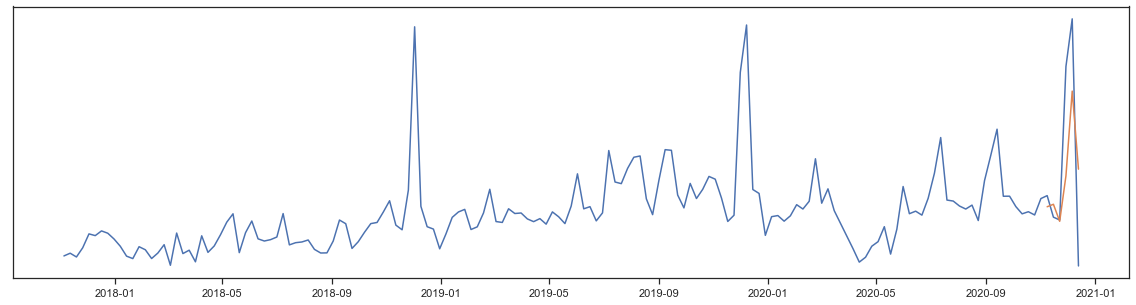

In [54]:
#merge with actual sales dataframe
plt.figure(figsize=(20,5))

df_sales_pred = pd.merge(df_weeklysales,df_result,on='date',how='left')
#plot actual and predicted
plot_data = [
    plt.plot(
        df_sales_pred['date'],
        df_sales_pred['salesamt']
    ),
        plt.plot(
        df_sales_pred['date'],
        df_sales_pred['pred_value']
    )
    
]
plt.yticks([])
plt.show()
